# Deep Learning Medical Image Classification & A nalysis using Keras for multi-class classification task

# Library & Data Import

## Import Libraries

Import and load necessary python packages to the instance. 

In [103]:
# Built-in Imports 
# Random module loaded to perform random operations like generating randon numbers, shuffling a list, etc

import random

In [104]:
# Importing Required Python Libraries
# Import 'Numpy' for Numerical Operations in Python
# Import 'Pandas' for Data Operations & Analysis
# Import 'MatPlotLib' for Visualisation requirements 
# Import necessary functions from 'SkLearn.Metrics' for evaluate the performance of machine learning models 
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [105]:
# Importing Required Libraries from Keras API of TensorFlow
# Import 'Layers' & 'Regularizers' module to build and train convolutional, dense layers for neural networks
# Import 'Model' and 'Sequential' classes to define, build and train - image and complex layers classifications
# Import 'SGD' (Stochastic Gradient Descent) optimisers classes for CNN Model training
# Import 'RMSProp' (Root Mean Square Propagation) optimisers classes for Dense Model training
# Import 'Adam' optimisers classes for Regularization Model training
# Import 'L1','L2','L1_L2' regularization function for neural network training
# Import 'get_file' utility function to download a file from the path and save locally
# Import 'to_categorical' utility function to convert class labels to one-hot encoded vectors 
# Import 'ImageDataGenerator' class for generating batch wise image data for neural network training
# Import 'Early Stop' callback function for Regularization Model

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

## Download Dataset

Selecting a specific data set from the MedMNIST Repository and importing the details of that specific dataset as a NumPy array object to Google Colab instance. Then Download & Store the dataset files from the specified URL on the info file. 

*   Select and set the name of dataset to processed to **BloodMNIST**, a multi-class classification task data set.
*   Using the wget function, download the python file info.py from the MedMNIST GitHub repository.
* import the informations ( **INFO** ) regarding the specific data set - **BloodMNIST** from the **MedMNIST** dictionary which contains data about different medical images.

In [106]:
# Select a multi-class classification task medical image dataset 'BloodMNIST'
DATA_NAME = "BloodMNIST"

# Download the data file MedMNIST 
!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py

# Load info from MedMNIST dictionary revelent to selected medical image dataset 
from info import INFO
data = INFO[DATA_NAME.lower()]

--2023-04-11 00:31:46--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22841 (22K) [text/plain]
Saving to: ‘info.py.2’

info.py.2           100%[===================>]  22.31K  --.-KB/s    in 0.002s  

2023-04-11 00:31:46 (12.3 MB/s) - ‘info.py.2’ saved [22841/22841]





*   Downloads the **BloodMNIST** dataset files from the URL specified in the **info.py** and saves that to **dataset.npz** using the **get_file** function



In [107]:
# Downloads the 'BloodMNIST' dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz", 
                     origin=data["url"], 
                     md5_hash=data["MD5"])

* Load the **BloodMNIST** dataset files to a numpy object - **dataset**. 
* **Training**, **Validation**, and **testing** data i.e., images with corresponding labels are extracted and stored to :    
 * Training Images - **train_x**, Training Labels - **train_y**
 * Validation Images - **val_x**, Validation Lables - **val_y**
 * Testing Images - **test_x**, Test Labels - **test_y**

* The keys used to access the images and label for train, val, test is already used in the **info.py** file. (eg: train_images, train_labels, etc) 

In [108]:
# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

## Data Exploration

Examine and Generate random image from the dataset. 



The medicial image of the **BloodMNIST** data set is examined to make sure that is suitable to use in machine learning algorithm. 

* List of labels is been declared as '**labels**'. 

* Categories in the dataset and the total number of images are included in that list. Then, the number of images assigned to each category in each of the training/validation/testing datasets is calculated. 

* Then the result is printed in table format.

By examining the table results, we can identify how evenly the images are distributed and any irregularities that may affect the machine learning model's performance. 

In [109]:
# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
_, train_counts = np.unique(train_y, return_counts=True)
_, val_counts = np.unique(val_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]), 
                            np.append(val_counts, [sum(val_counts)]), 
                            np.append(test_counts, [sum(test_counts)]))), 
                   index=labels, columns=["Train", "Val", "Test"]))

                                                    Train   Val  Test
basophil                                              852   122   244
eosinophil                                           2181   312   624
erythroblast                                         1085   155   311
immature granulocytes(myelocytes, metamyelocyte...   2026   290   579
lymphocyte                                            849   122   243
monocyte                                              993   143   284
neutrophil                                           2330   333   666
platelet                                             1643   235   470
total                                               11959  1712  3421


* Display a random generated image with its label from the training data set of **BloodMNIST**

10046: monocyte


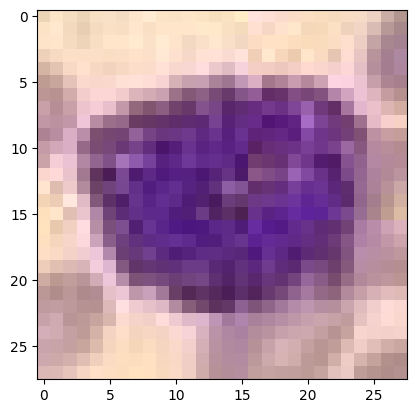

In [110]:
# Displays a random image from training dataset.
index = random.randint(0, len(train_x))
print(f"{index}: {labels[train_y[index][0]]}")
plt.imshow(train_x[random.randint(0, len(train_x))])

## Data Processing 

Image Augmentation & Conversion to single array for check the variations and improved results

* Image augmentation with centralisation, standard normalization, and flip features. 

In [111]:
# Defines the data generator that will be used to augment the images as they are loaded.
data_generator = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

* Use the image data generator to fit and combine the training and validation image data into a single array.

In [112]:
# Combine the training and validation image data into a single array
data_generator.fit(np.append(train_x, val_x, 0))

# Using different Models Used to Define, Train, and Analyse the Learning Curves

A. Convolutional Neural Network (CNN) Model
<br>
B. Dense Neural Network Model without convolutional layer
<br>
C. Deep Neural Network with Regularization Techniques

# A.  Convolutional neural network model

> Convolutional Neural Networks (CNN) is a type of neural network that use the mathematical operation called convolution instead of general matrix multiplication in at least one of their layers. 
<br><br>
> This convolutional layer consists of three stages : 
<br>
1. <b>Convolution Stage</b> : Perform several convolutions in parallel to produce a set of linear activations.
<br>
2. <b>Detector Stage</b> : Each linear activation runs through a nonlinear activation function ( i.e; rectified linear activation function )
<br>
3. <b>Pooling Stage</b> : Pooling function is used to modify the output of layers with a summary statistic of nearby outputs.
* **SGD optimiser** is used here to Model training on the CNN Model because of it's Simplicity and Efficiency. 
<br><br>
The CNN Model's Working Concept is to **Fragment** Images into receptive fields & Analyse those in **separate** convolutional layers.
<br><br>
Reference : Chapter 9 (Convolutional Networks) of 
Goodfellow, Bengio and Courville. Deep Learning. MIT Press 2016 




The Evaluation and Analyse of Medical images using the Convolutional Neural Network (CNN) Model involves : 

* Define Model 
* Training Model 
* Model Evaluation & Learning Curves 

#### Model Definition

* The CNN Model consists of **one input layer, two convolutional layers with max pooling, one flatten layer and an output layer**.
<br><br>
* Both **Convolutional Layers** have 32 Filters and a 3x3 Kernel Size use **ReLU Activation Function** (Rectified Linear Unit Activation Function) to the inputs. 
* Both **Max Pooling layers** reduce the dimension of the output layer of each convolutional layer to the Pool Size of 2x2.
<br><br>
* The **Input layer** takes the **Image** as the **Input**
* **Input Layer Output** as **1st Convolutional Layer Input**  
* **1st Convolutional Layer Output** to **1st Pooling Layer Input**
* **1st Pooling Layer Output** to **2nd Convolutional Layer Input** 
* **2nd Convolutional Layer Output** to **2nd Pooling Layer Input**
* **2nd Pooling Layer Output** to **Flatten Input** 
<br><br>
* The **Flatten Layer Input** is converted to a one dimensional array.  
* Then **Flatten layer Output** is passed to fully connected output later with a softmax function to results a probability distribution of the output classes.
<br><br> 
* Then the model is initiated as **CNNModel** and the summary of the model with structure and number of parameters in each layer is printed.

In [113]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Flattens the outputs of the convolutional layers into a one dimensional array.
flatten = layers.Flatten()(pool_2)

# Defines the output layer of the model a number of output nodes equal to the number of classes.
output = layers.Dense(units=len(np.unique(train_y)), activation="softmax")(flatten)

# Initilises the defined model and prints summary of the model.
cnn_model = Model(inputs=input, outputs=output, name="CNN_Model")
cnn_model.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 800)               0 

#### Model Training

Defines the parameters for the neural network training and validation process to optimize the performance. 

* Define the number of samples in each batch of data fed into training.
* Define the number of times the entire dataset is passed through training.
* Define the Learning Rate to control the step size in each iteration of the optimization algorithm.

In [114]:
# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

Define the optimizer used to adjust the weights of the training model and compiles the model. 
* SGD Optimizer is used in CNN Model. The Learning Rate is defined as a specific rate to improve performance. 
* Compile the model by using specific loss functions and **accuracy** metrics to evaluate the model's training. 
*  **categorical_crossentropy** loss function is used here since it's a multi-class classification task. 

In [115]:
# Defines the optimiser used to adjust the model weights and compiles the model.
optimiser = SGD(learning_rate=LEARNING_RATE)
cnn_model.compile(optimizer=optimiser, loss="categorical_crossentropy", metrics=["accuracy"])

Passing the Training & Validation data to the model

* During the training the model evaluates validation data over each epoch of training in order to monitor the performance of model. 

* **Fit** method trains the model on the generated data for the define number of epochs. 

* Using the **to_categorical** function, Each Label name is represented by unique integer as 1, 2, 3, 4 and that is defined in binary vector of 0's & 1's.

* **Training data** is generated by **data_generator.flow** methods from **training data** and **one-hot encoded training label** in defined **batch size**. 

* **Number of steps to be used for each epoch** of training is set by dividing the **total number of training samples** by the **batch size**. 

* **Validation Data** is generated by the **data_generator.flow** method from **Validation data** and it's **one-hot encoded training label** in a defined **batch size**. 

* **Validation Step** is set by dividing the **total number of validation samples** by the **batch size**.

* **epochs** parameter is set the define **NUM_EPOCHS**

* The **cnn_history** computes & stores the progress and performance of the model in terms of loss and accuracy which can be used to visualise and evaluate the performance of the model. 






In [116]:
# Using the data generator to pass the training and validation data to the model to train it.
cnn_history = cnn_model.fit(data_generator.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE), 
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

Epoch 1/10
186/186 [==============================] - 3s 10ms/step - loss: 1.9711 - accuracy: 0.2385 - val_loss: 1.8449 - val_accuracy: 0.3540
Epoch 2/10
186/186 [==============================] - 2s 10ms/step - loss: 1.7570 - accuracy: 0.4206 - val_loss: 1.6675 - val_accuracy: 0.4533
Epoch 3/10
186/186 [==============================] - 2s 8ms/step - loss: 1.5810 - accuracy: 0.4809 - val_loss: 1.5066 - val_accuracy: 0.5134
Epoch 4/10
186/186 [==============================] - 2s 8ms/step - loss: 1.4330 - accuracy: 0.5151 - val_loss: 1.3659 - val_accuracy: 0.5298
Epoch 5/10
186/186 [==============================] - 2s 8ms/step - loss: 1.3138 - accuracy: 0.5472 - val_loss: 1.2572 - val_accuracy: 0.5701
Epoch 6/10
186/186 [==============================] - 2s 8ms/step - loss: 1.2207 - accuracy: 0.5771 - val_loss: 1.1707 - val_accuracy: 0.6028
Epoch 7/10
186/186 [==============================] - 2s 8ms/step - loss: 1.1494 - accuracy: 0.6094 - val_loss: 1.1019 - val_accuracy: 0.6174
Epoc

Evaluate the Test Accuracy by 

* Calling **evaluate** methods on the test dataset
* Generate the batches of the test dataset that is passed to the **test data** and **its one-hot encoded test labels** under the parameter of batch size.
* Then evaluate function return two values called **test loss** and **test accuracy** which can be used to visualise and evaluate the performance of the model.

In [117]:
# Evaluate the test accuracy
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(data_generator.flow(test_x, to_categorical(test_y), batch_size=BATCH_SIZE))
print('\n Test accuracy:', cnn_test_acc)
print('\n Test loss :', cnn_test_loss)

54/54 [==============================] - 0s 7ms/step - loss: 0.9471 - accuracy: 0.6872

 Test accuracy: 0.6872259378433228

 Test loss : 0.9471487998962402


### Learning Curve Analysis

Plot CNN Model Accuracy

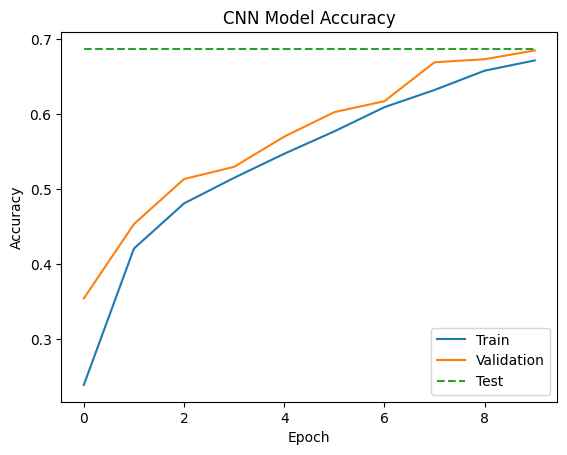

In [118]:
# Plots the training, validation and test accuracy over the number of epochs.
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.plot(range(NUM_EPOCHS), [cnn_test_acc] * NUM_EPOCHS, linestyle='--')
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='lower right')
plt.show()

**Analysis of CNN Model Accuracy** 

* Training Accuracy - 67%
* Validation Accuracy - 69%
* Test Accuracy - 69%

The CNN model has a training, validation and testing accuracy between 67% & 69% which is a similar range and indicates that the model is performing well with a good fit to the accuracy over Training, Validation and Testing sets. 

Plot CNN Model Loss

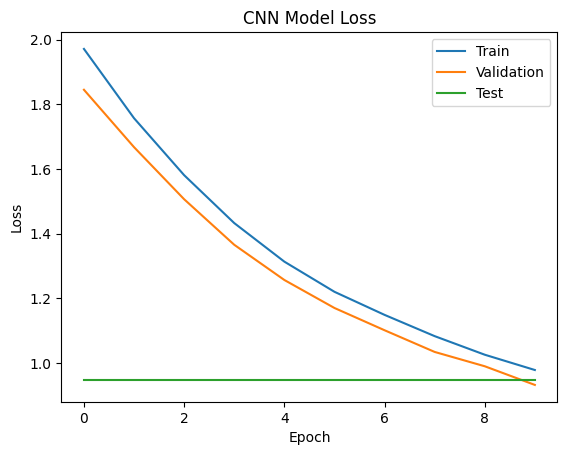

In [119]:
# Plots the training, validation and test loss over the number of epochs.
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.plot(range(NUM_EPOCHS), [cnn_test_loss] * NUM_EPOCHS, linestyle='-')
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='upper right')
plt.show()

**Analysis of CNN Model Loss** 

* Training Loss - 0.98
* Validation Loss - 0.93
* Test Loss - 0.95 

The CNN model has a training, validation and testing loss between 0.98 & 0.93 which is a similar range and indicates that the model is performing well with good fit to the loss over Training, Validation and Testing sets. And the Training Loss is the highest. The fact that the validation and testing losses are below the range of training losses means that the model is performing well in generalising unseen and new data.

Plot CNN Model Performance

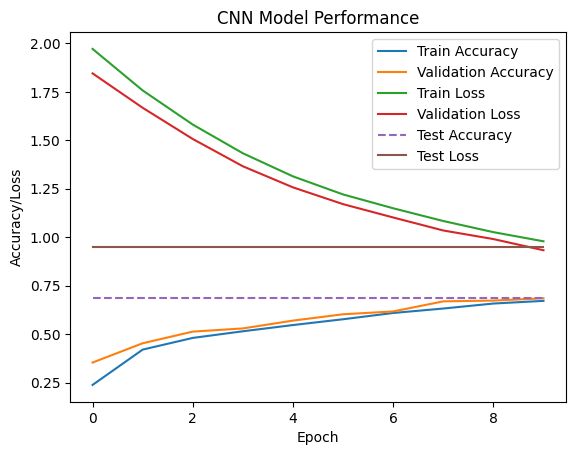

In [120]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])

# Plots the training and validation loss over the number of epochs.
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])

# Plots the test accuracy and loss all number of epochs.
plt.plot(range(NUM_EPOCHS), [cnn_test_acc] * NUM_EPOCHS, linestyle='--')
plt.plot(range(NUM_EPOCHS), [cnn_test_loss] * NUM_EPOCHS, linestyle='-')

#Show Plot with Legends
plt.title('CNN Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'Test Accuracy','Test Loss'], loc='upper right')
plt.show()


**Analysis of CNN Model Performance** 

* Training Accuracy - 67%
* Validation Accuracy - 69%
* Test Accuracy - 69%
<br><br>
* Training Loss - 0.98
* Validation Loss - 0.93
* Test Loss - 0.95 

The overall model is performing well, with a test accuracy of 67% and a test loss of 0.95. During the model training, the loss and accuracy are improving over each epoch.

Improvements Required : Need to do image augmentation and adjust the parameters to improve the model's performance.

# B. Dense Neural Network Model

> Dense Neural Network Model is a type of feed forward neural network that consists of multiple fully connected dense layers. 
* The input layers consist of flattened image pixels and the output layer consists of representations of different blood cell types. 
* There will be multiple fully connected hidden layers between the input and output layers. These layers are connected to the previous layers and have been assigned weight. 
* The output layer is calculated by applying an activation function like **ReLU function** (which is used to learn more complex patterns in the data) and **Softmax function** ( which is used to output a probability distribution over the output classes)
* **RMSprop Optimizer** is used in Dense Neutral Network model since it has an adaptive learning rate optimisation algorithm. 
<br>
<br>
Reference : Chapter 6 (Deep Feedforward Networks) of 
Goodfellow, Bengio and Courville. Deep Learning. MIT Press 2016 

The Dense Neural Network Model Working Concept uses **multiple fully connected layers** of input neurons and activation functions to learn complex patterns. The model is trained with an optimisation algorithm to minimize the loss.   


The Evaluation and Analysis of Medical images using a Dense Neural Network Model involves : 

* Define Model 
* Training Model 
* Model Evaluation & Learning Curves 

#### Model Definition

* The **Dense Model** consist of  **one input layer, a flatten layer, two connected hidden dense layers, and a output layer**.
<br><br>
* The **Flattening Layer** convert the **2D Input** to a **1D Array**.
* The **Dense Layers** with **16** and **8 neurons** will use the **ReLU Activation Function** (Rectified Linear Unit Activation Function) to match the total parameters of CNN Model.
<br><br>
* **Input Layer** takes the **Image** as **Input**.
* Then the **Input Layer Output** is pass to **Flatten Layer Input**
* The **Flatten Layer Output** is passed to **1st Hidden Dense Layer Input**
* The **1st Hidden Dense Layer Output** is then passed as input to 2nd hidden dense layer 
* The **2nd Hidden Dense Layer Output** is passed to fully connected output  with a **Softmax Function** to results a probability distribution of the output classes. 
<br><br>
* Then the model is initiated as **DenseModel** and the summary of the model is printed, showing the structure and number of parameters in each layer.

In [121]:
# Define the input layer of the model with the size of an image.
input = Input(shape=train_x[0].shape)

# Flatten the input layer.
flatten = Flatten()(input)

# Define the hidden layers of the model.
dense_1 = layers.Dense(units=8, activation="relu")(flatten)
dense_2 = layers.Dense(units=4, activation="relu")(dense_1)

# Define the output layer of the model a number of output nodes equal to the number of classes.
output = Dense(units=len(np.unique(train_y)), activation="softmax")(dense_2)

# Initilises the defined model and prints summary of the model.
dense_model = Model(inputs=input, outputs=output, name="DenseModel")
dense_model.summary()

Model: "DenseModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 flatten_10 (Flatten)        (None, 2352)              0         
                                                                 
 dense_24 (Dense)            (None, 8)                 18824     
                                                                 
 dense_25 (Dense)            (None, 4)                 36        
                                                                 
 dense_26 (Dense)            (None, 8)                 40        
                                                                 
Total params: 18,900
Trainable params: 18,900
Non-trainable params: 0
_________________________________________________________________


#### Model Training

Defines the parameters for the neural network training and validation process to optimize the performance. 

* Define the number for samples in each batch of data fed into training.
* Define the number of times the entire dataset is passed through training.
* Define the Learning Rate to control the step size in each iteration of the optimization algorithm.

In [122]:
# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

Define the optimizer used to adjust the weights of the training model and compile the model. 

* RMSprop Optimizer is used in Dense Model. The Learning Rate is defined as a specific rate to improve performance. 
* Compile the model by using specific loss functions and **accuracy** metrics to evaluate the model's training. 
*  **categorical_crossentropy** loss function is used here since it's a multi-class classification task. 

In [123]:
# Defines the optimiser used to adjust the model weights and compiles the model.
optimizer = RMSprop(learning_rate=LEARNING_RATE)
dense_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

Passing the Training & Validation data to the model

* During the training the model evaluates validation data over each epoch of training in order to monitor its performance. 

* **Fit** method trains the model on the generated data for the defined number of epochs.  

* **Training data** is generated by **data_generator.flow** methods from **training data** and **one-hot encoded training label** in defined **batch size**.

* **Number of steps to be used for each epoch** of training is set by dividing the **total number of training samples** by the **batch size**. 

* **Validation Data** is generated by **data_generator.flow** method from **Validation data** and **one-hot encoded training label** in defined **batch size**. 

* **Validation Step** is set by dividing the **total number of validation samples** by the **batch size**.

* **epochs** parameter is set the define **NUM_EPOCHS**

* The **dense_history** computes & stores the progress and performance of the model in terms of loss and accuracy which can be used to visualise and evaluate the performance of the model. 

In [124]:
# We use the data generator to pass the training and validation data to the model to train it.
dense_history = dense_model.fit(data_generator.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE), 
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

Epoch 1/10
186/186 [==============================] - 3s 9ms/step - loss: 1.8830 - accuracy: 0.2774 - val_loss: 1.7800 - val_accuracy: 0.3137
Epoch 2/10
186/186 [==============================] - 2s 9ms/step - loss: 1.7487 - accuracy: 0.3217 - val_loss: 1.6922 - val_accuracy: 0.3329
Epoch 3/10
186/186 [==============================] - 2s 11ms/step - loss: 1.6656 - accuracy: 0.3512 - val_loss: 1.5953 - val_accuracy: 0.3680
Epoch 4/10
186/186 [==============================] - 2s 8ms/step - loss: 1.5111 - accuracy: 0.4262 - val_loss: 1.4455 - val_accuracy: 0.5088
Epoch 5/10
186/186 [==============================] - 1s 8ms/step - loss: 1.3727 - accuracy: 0.5557 - val_loss: 1.3351 - val_accuracy: 0.5514
Epoch 6/10
186/186 [==============================] - 1s 8ms/step - loss: 1.2654 - accuracy: 0.5747 - val_loss: 1.2184 - val_accuracy: 0.5900
Epoch 7/10
186/186 [==============================] - 2s 8ms/step - loss: 1.1839 - accuracy: 0.5877 - val_loss: 1.1144 - val_accuracy: 0.5999
Epoch

Evaluate the Test Accuracy by 

* Calling **evaluate** methods on the test dataset
* Generate the batches of test datasets that are passed to **test data** and **its one-hot encoded test labels** under the parameter of batch size.
* Then in the evaluate function return two values called **test loss** and **test accuracy** which can be used to visualise and evaluate the performance of the model.

In [125]:
dense_test_loss, dense_test_acc = dense_model.evaluate(data_generator.flow(test_x, to_categorical(test_y), batch_size=BATCH_SIZE))
print('Test Loss:', dense_test_loss)
print('Test Accuracy:', dense_test_acc)

54/54 [==============================] - 0s 7ms/step - loss: 1.0364 - accuracy: 0.6060
Test Loss: 1.036442518234253
Test Accuracy: 0.6059631705284119


###Learning Curve Analyse

Plot Dense Model Accuracy

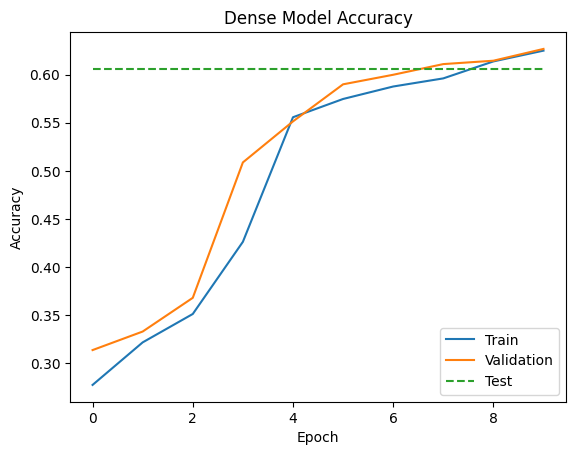

In [126]:
# Plots the training, validation and test accuracy over the number of epochs.
plt.plot(dense_history.history['accuracy'])
plt.plot(dense_history.history['val_accuracy'])
plt.plot(range(NUM_EPOCHS), [dense_test_acc] * NUM_EPOCHS, linestyle='--')
plt.title('Dense Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='lower right')
plt.show()

**Analysis of Dense Model Accuracy** 

* Training Accuracy - 63%
* Validation Accuracy - 63%
* Test Accuracy - 60%

Dense model seems to have lower performance as compared to the CNN model. Training & Validation Accuracy is just 63% where the CNN model has a slightly better rate of 67%. Even though the Accuracy is low, the model is not having any issues like overfitting since the validation and testing accuracies are close to the training accuracy.  

Plot Dense Model Loss

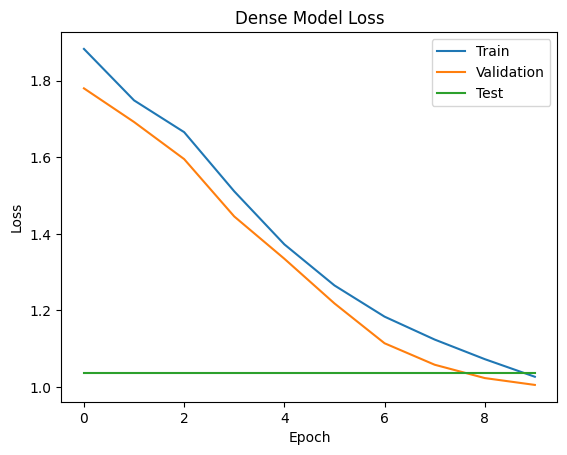

In [127]:
# Plots the training, validation and test loss over the number of epochs.
plt.plot(dense_history.history['loss'])
plt.plot(dense_history.history['val_loss'])
plt.plot(range(NUM_EPOCHS), [dense_test_loss] * NUM_EPOCHS, linestyle='-')
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='upper right')
plt.show()

**Analysis of Dense Model Loss**

* Training Loss - 1.03
* Validation Loss - 1.01
* Test Loss - 1.04

From the graph we can see that the model has a consistent reduction over the loss on both training and validation which indicates the better learning and improvement aspect of the model. But the test loss is around 1.04 which is higher than the training and validation loss which indicates some overfitting in the model after epoch 8 which can be seen in the graph also.

Plot Dense Model Performance

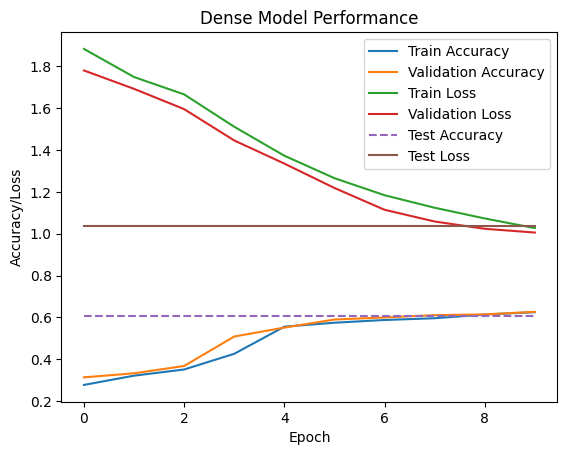

In [128]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(dense_history.history['accuracy'])
plt.plot(dense_history.history['val_accuracy'])

# Plots the training and validation loss over the number of epochs.
plt.plot(dense_history.history['loss'])
plt.plot(dense_history.history['val_loss'])

# Plots the test accuracy and loss all number of epochs.
plt.plot(range(NUM_EPOCHS), [dense_test_acc] * NUM_EPOCHS, linestyle='--')
plt.plot(range(NUM_EPOCHS), [dense_test_loss] * NUM_EPOCHS, linestyle='-')

#Show Plot with Legends
plt.title('Dense Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'Test Accuracy','Test Loss'], loc='upper right')
plt.show()


**Analysis of Dense Model Performance** 

* Training Accuracy - 63%
* Validation Accuracy - 63%
* Test Accuracy - 60%
<br><br>
* Training Loss - 1.03
* Validation Loss - 1.01
* Test Loss - 1.04

Based on Training & Validation accuracy we can conclude the model is performing well in terms of decreasing loss and increasing accuracy. But when compared to the test accuracy of 60% and test loss of 1.04 is clear that the model was subjected to some overfitting after epochs 8 & 9 which can be seen in the graph.

**Improvement Needed :** This can be improved by using regularization techniques to reduce overfitting.

# C. Deep  Neural Network with Regularization Techniques 

> Deep Neural Network with Regularization Technique is a type of feed forward neural network that uses multiple layers of neurons and regularization techniques to prevent overfitting of data.  The Model consists of multiple layers of neuron layers including fully connected dense layers, convolutional layers, pooling layers and dropout layers.<br> <br>
The Deep Neural Network with Regularization Technique Model Working Concept uses a combination of multiple convolutional and dense layers with several regularization methods like L1 & L2 Regularizera, Dropout Layers, Data Augmentation and Early Stopping to reduce the overfitting of deep networks.  
* Image Augmentation features are used to improve the performance of the model.
* The input layers consist of the flattened image pixels. 
* There will be a combination of multiple **Convolutional layers** with pooling and fully connected **Dense layers** between the input and output layers. These layers are connected to the previous layers and have been assigned weight.
*  **L1 & L2 Kernal Regularisation** are used in convolutional and dense layers. 
* **Flatten layers** are used to convert the convolutional layer to a one dimensional array
* **Dropout Regularisation layers** are used to prevent overfitting. 
* **ReLU Activation function** is used in Dense and Convolutional Layes to learn more complex patterns in the data.
* **Softmax function** used in output for a probability distribution over the output classes.
* **Adam Optimizer** is used in Dense Neutral Network model since it has an adapative learning rate optimisation algorithm.
* **Early Stop** is used to stop the training if the validation loss is not improving after a set number of epochs. 
<br>
<br>
Reference : Chapter 7 (Regularization for Deep Learning) of 
Goodfellow, Bengio and Courville. Deep Learning. MIT Press 2016 




The Evaluation and Analysis of Medical images using Deep Neural Network with Regularization Technique Model involves : 

* Define Model 
* Training Model 
* Model Evaluation & Learning Curves 

### Define Model

* The **Deep Neural Network with Regularization Techniques Model** consists of  **one input layer,  Multiple convolutional layers with max pooling and batch normalization, Multiple Dense layers with dropout and L2 Regularizers, a flatten layer, a dropout layer and an output layer**.
<br><br>
* Both **Convolutional Layers** have 8 & 16 Filters and 3x3 Kernel Size use **ReLU Activation Function** (Rectified Linear Unit Activation Function) tomatch the parameters of convets of CNN Model. 
* Both **Max Pooling layers** reduces the dimension of the output layer of each convolutional layer to the Pool Size of 2x2.
<br><br>
* The **Input layer** takes the **Image** as the **Input**
* **Input Layer Output** as **1st Convolutional Layer Input**  
* **1st Convolutional Layer Output** to **1st Pooling Layer Input**
* **1st Pooling Layer Output** to **2nd Convolutional Layer Input** 
* **2nd Convolutional Layer Output** to **2nd Pooling Layer Input**
* **2nd Pooling Layer Output** to **Flatten Input** 
<br><br>
* The **Flatten Layer Input** is converted to a one dimensional array. 
* The **Flatten Layer Output** is passed to a **Dense Layer Input**
* The **Dense Layer Output** is then passed as input of a **Dropout Layer** 
* The **Drop Output** is passed to fully connected output  with a **Softmax Function** to produce a better result with less overfitting and a probability distribution of the output.  
<br><br>
* Then the model is initiated as **RegularisedModel** and the summary of the model is printed, with the structure and number of parameters in each layers.

In [129]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Define an ImageDataGenerator for data augmentation.
data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Defines the Multiple convolutional layer with max pooling and batch normalization.
conv_1 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(input)
batch_norm_1 = BatchNormalization()(conv_1)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(batch_norm_1)
conv_2 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(pool_1)
batch_norm_2 = BatchNormalization()(conv_2)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(batch_norm_2)

# Flattens the outputs of the convolutoonal layers into a one dimensional array.
flatten = layers.Flatten()(pool_2)

# Define Multiple Dense layers with dropout and L2 Regularizers
dense_1 = Dense(units=32, activation="relu", kernel_regularizer=l2(0.01))(flatten)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(units=16, activation="relu", kernel_regularizer=l2(0.01))(dropout_1)
dropout_2 = Dropout(0.5)(dense_2)

# Defines the output layer of the model a number of output nodes equal to the number of classes.
output = layers.Dense(units=len(np.unique(train_y)), activation="softmax")(dropout_2)

# Initilises the defined model and prints summary of the model.
reg_model = Model(inputs=input, outputs=output, name="RegularisedModel")
reg_model.summary()

Model: "RegularisedModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 8)         224       
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 8)        32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 batch_normalization_6 (Batc  (None, 11, 11, 16)  

### Train Model

Defines the parameters for the neural network training and validation process to optimize the performance. 

* Define the number of samples in each batch of data fed into training.
* Define the number of times the entire dataset is passed through training.
* Define the Learning Rate to control the step size in each iteration of the optimization algorithm.

In [130]:
# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

Define the optimizer used to adjust the weights of the training model and compile the model. 
* **Adam Optimizer** is used in Dense Model. The Learning Rate is defined as a specific rate to improve performance. 
* Compile the model by using specific loss functions and **accuracy** metrics to evaluate the model's training. 
*  **categorical_crossentropy** loss function is used here since it's a multi-class classification task. 

In [131]:
# Defines the optimiser used to adjust the model weights and compiles the model.
optimizer = RMSprop(learning_rate=LEARNING_RATE)
reg_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

Passing the Training & Validation data to the model

* During the training the model evaluate validation data over each epoch of training in order to monitor the performance of model. 

* **Fit** method trains the model on the generated data for the define number of epochs. 

* **Training data** is generated by **data_generator.flow** methods from **training data** and **one-hot encoded training label** in defined **batch size**.

* **Number of steps to be used for each epoch** of training is set by dividing the **total number of training samples** by the **batch size**. 

* **Validation Data** is generated by **data_generator.flow** method from **Validation data** and it's **one-hot encoded training label** in defined **batch size**. 

* **Validation Step** is set by dividing the **total number of validation samples** by the **batch size**.

* **epochs** parameter is set the define **NUM_EPOCHS**

* The **reg_history** computes & stores the progress and performance of the model in terms of loss and accuracy which can be used to visualise and evaluate the performance of the model. 

* **EarlyStopping** callback to stop training if the validation loss stops improving.

In [132]:
# Define an EarlyStopping callback to stop training if the validation loss stops improving.
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Passing the Training & Validation data to the model
reg_history = reg_model.fit(data_generator.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE), 
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    callbacks=[early_stop])

Epoch 1/10
186/186 [==============================] - 9s 39ms/step - loss: 2.5680 - accuracy: 0.2560 - val_loss: 2.0546 - val_accuracy: 0.3481
Epoch 2/10
186/186 [==============================] - 6s 33ms/step - loss: 1.7823 - accuracy: 0.4339 - val_loss: 1.4985 - val_accuracy: 0.5537
Epoch 3/10
186/186 [==============================] - 6s 33ms/step - loss: 1.3924 - accuracy: 0.5611 - val_loss: 0.9776 - val_accuracy: 0.7336
Epoch 4/10
186/186 [==============================] - 7s 38ms/step - loss: 1.2160 - accuracy: 0.6153 - val_loss: 0.9382 - val_accuracy: 0.7097
Epoch 5/10
186/186 [==============================] - 7s 36ms/step - loss: 1.1047 - accuracy: 0.6474 - val_loss: 0.7985 - val_accuracy: 0.7541
Epoch 6/10
186/186 [==============================] - 6s 32ms/step - loss: 1.0262 - accuracy: 0.6666 - val_loss: 0.8764 - val_accuracy: 0.7015
Epoch 7/10
186/186 [==============================] - 7s 37ms/step - loss: 0.9816 - accuracy: 0.6814 - val_loss: 0.8576 - val_accuracy: 0.6758

Evaluate the Test Accuracy by 

* Calling **evaluate** methods on the test dataset
* Generate the batches of test dataset which is passed to **test data** and **its one-hot encoded test labels** under the parameter of batch size.
* Then evaluate function return two values called **test loss** and **test accuracy** which can be used to visualise and evaluate the performance of the model.

In [133]:
reg_test_loss, reg_test_acc = reg_model.evaluate(data_generator.flow(test_x, to_categorical(test_y), batch_size=BATCH_SIZE))
print('Test Loss:', reg_test_loss)
print('Test Accuracy:', reg_test_acc)

54/54 [==============================] - 2s 28ms/step - loss: 0.9008 - accuracy: 0.6758
Test Loss: 0.9008117318153381
Test Accuracy: 0.6758257746696472


### Learning Curve Analyse

Plot Regularized Model Accuracy

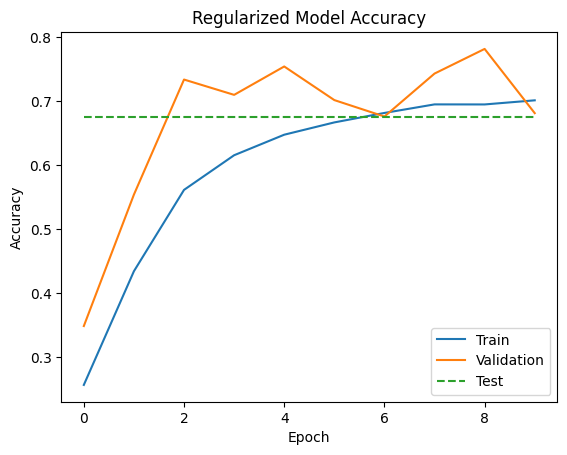

In [134]:
# Plots the training, validation and test accuracy over the number of epochs.
plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])
plt.plot(range(NUM_EPOCHS), [reg_test_acc] * NUM_EPOCHS, linestyle='--')
plt.title('Regularized Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='lower right')
plt.show()

**Analysis of Regularized Model Accuracy** 

* Training Accuracy - 70%
* Validation Accuracy - 68%
* Test Accuracy - 67%

The Regularisation model is showing good performance on the training and validation sets, with accuracy of 70% and 68%, but its performance in the Testing accuracy set is a bit lower than the other two sets. The Accuracy of the training data is the highest, and the three sets of data indicate there might be a chance for overfitting on the training data. But the difference between the Validation and Test Accuracy is not significant which indicates there is no overfitting to the validation data. Overall the model is performing well with the highest training and validation accuracy.

Plot Regularized Model Loss

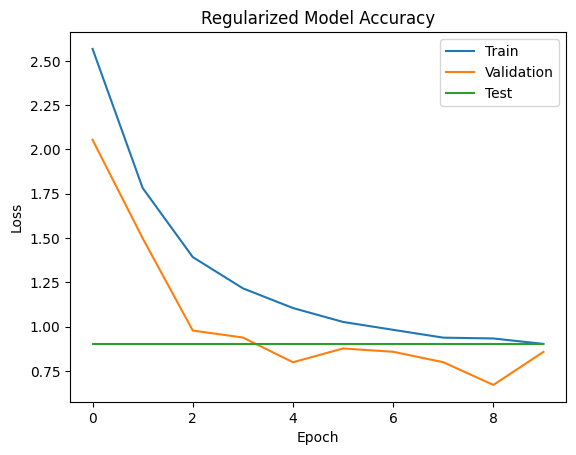

In [135]:
# Plots the training, validation and test loss over the number of epochs.
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.plot(range(NUM_EPOCHS), [reg_test_loss] * NUM_EPOCHS, linestyle='-')
plt.title('Regularized Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation','Test'], loc='upper right')
plt.show()

**Analysis of Regularized Model Loss** 

* Training Loss - 0.90
* Validation Loss - 0.85
* Test Loss - 0.90

Regularized model has a declining loss over the eproches on training and validation which indicates its improvement on training data. The Training loss initialises at 2.57 and declines to 0.90 at the final epoch, whereas the validation loss initialized at 2.05 and ends at 0.85. This trend indicates that the model is learning well from new and unseen data. And the loss at testing the model is at 0.90 which indicates the regularization is preventing overfitting.

Plot Regularized Model Performance

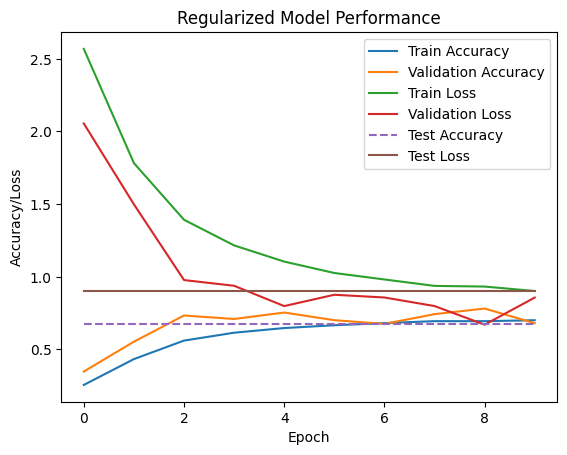

In [136]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])

# Plots the training and validation loss over the number of epochs.
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])

# Plots the test accuracy and loss all number of epochs.
plt.plot(range(NUM_EPOCHS), [reg_test_acc] * NUM_EPOCHS, linestyle='--')
plt.plot(range(NUM_EPOCHS), [reg_test_loss] * NUM_EPOCHS, linestyle='-')

#Show Plot with Legends
plt.title('Regularized Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss', 'Test Accuracy','Test Loss'], loc='upper right')
plt.show()


**Analysis of Regularized Model Performance** 

* Training Accuracy - 88%
* Validation Accuracy - 91%
* Test Accuracy - 84%
<br><br>
* Training Loss - 0.32
* Validation Loss - 0.24
* Test Loss - 0.54

From the graph we can see the regularised model is performing well with the training and validation sets with increasing accuracy and decreasing loss. The 70% Accuracy and 0.90 Loss at testing are decent figures for both in the 3 model. Also in overall the regularized model seems to have good performance in terms of preventing overfitting and improving the learning.

# Evaluation and Conclusion of 3 Models

## Accuracy

##Training Accuracy Comparison

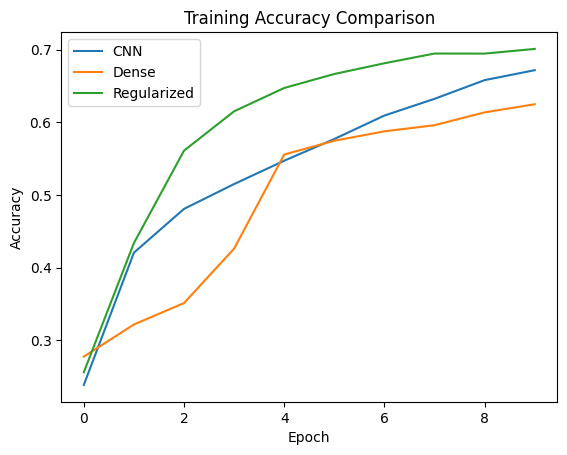

In [137]:
# Plot training accuracy for all three models on the same graph
plt.plot(cnn_history.history['accuracy'], label='CNN')
plt.plot(dense_history.history['accuracy'], label='Dense')
plt.plot(reg_history.history['accuracy'], label='Regularized')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Training Accuracy of 3 Models** 

The training accuracy for the three models is as follows:

* CNN Model: 67.18%

* Dense Model: 62.49%

* Regularized Model: 70.11%

While comparing the training accuracy graph and data, it's clear that the Regularized Model has the highest training accuracy followed by the CNN Model and then the Dense Model. This suggests that the Regularized model has better learning performance. But the higher training accuracy does not imply the model will have better testing accuracy. The model might get overfit to the training to falsify the higher training metrics. 

Training Accuracy :    
**Regularized Model > CNN Model > Dense Model**

## Validation Accuracy Comparison ##

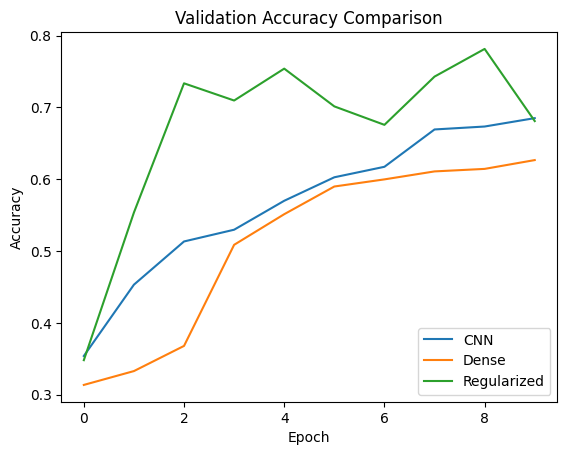

In [138]:
# Plot Validation accuracy for all three models on the same graph
plt.plot(cnn_history.history['val_accuracy'], label='CNN')
plt.plot(dense_history.history['val_accuracy'], label='Dense')
plt.plot(reg_history.history['val_accuracy'], label='Regularized')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Validation Accuracy of 3 Models** 

The validation accuracy for the three models is as follows:

* CNN Model: 68.51%

* Dense Model: 62.68%

* Regularized Model: 68.11%

While comparing the validation accuracy graph and data, it's clear that the CNN model & the Regularised model have almost the same values, making them the highest validation accuracy models and the Dense Model the least. This suggests that both the CNN & Regularized models are having better validation performance on the unseen data. 

Validation Accuracy :    
** CNN Model >= Regularized Model > Dense Model**

##Test Accuracy Comparison

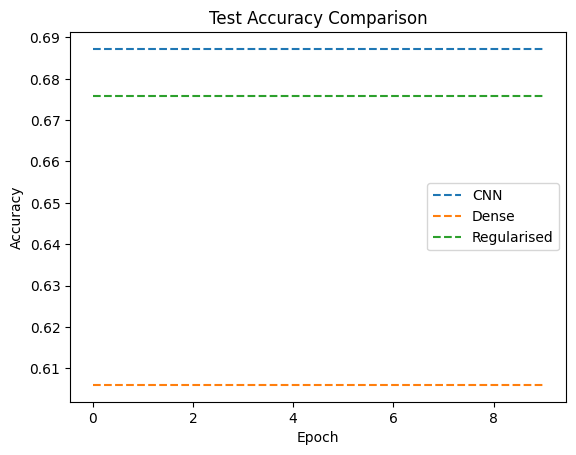

In [139]:
# Plot Testing accuracy for all three models on the same graph
plt.plot(range(NUM_EPOCHS), [cnn_test_acc] * NUM_EPOCHS, linestyle='--',label='CNN')
plt.plot(range(NUM_EPOCHS), [dense_test_acc] * NUM_EPOCHS, linestyle='--',label='Dense')
plt.plot(range(NUM_EPOCHS), [reg_test_acc] * NUM_EPOCHS, linestyle='--',label='Regularised')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Testing Accuracy of 3 Models** 

The Testing  accuracy for the three models is as follows:

* CNN Model: 68.72%

* Dense Model: 60.60%

* Regularized Model: 67.58%

While comparing the testing accuracy graph and data, it's clear that the CNN Model has the highest testing accuracy followed by Regularized Model and then the Dense Model. This suggests that the CNN model is having better test performance on the data

Testing Accuracy :    
**CNN Model > Regularized Model > Dense Model**

The Regularized Model has relatively the same accuracy and a better loss.

## Loss

##Training Loss Comparison##

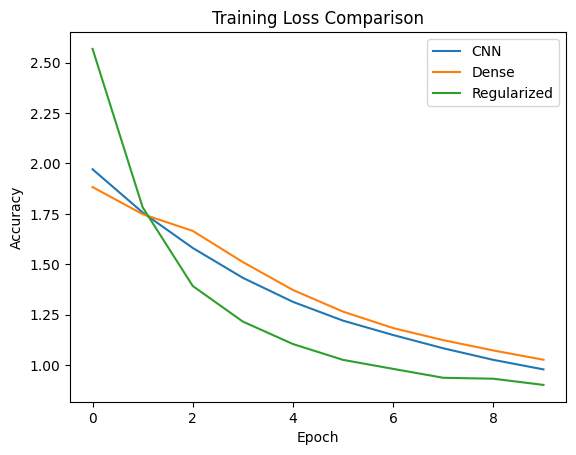

In [140]:
# Plot training loss for all three models on the same graph
plt.plot(cnn_history.history['loss'], label='CNN')
plt.plot(dense_history.history['loss'], label='Dense')
plt.plot(reg_history.history['loss'], label='Regularized')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Training Loss of 3 Models** 

The training Loss for the three models is as follows:

* CNN Model: 0.9790

* Dense Model: 1.026

* Regularized Model: 0.9020

WWhile comparing the training loss graph and data, it's clear that the Dense Model has the highest training  loss followed by the CNN Model and then the Regularized Model. This suggests that Regularized model is not as overfitting as other models as it has the lowest validation and testing loss.  

Training Loss :    
**Regularized Model < CNN Model < Dense Model**

##Validation Loss Comparison##

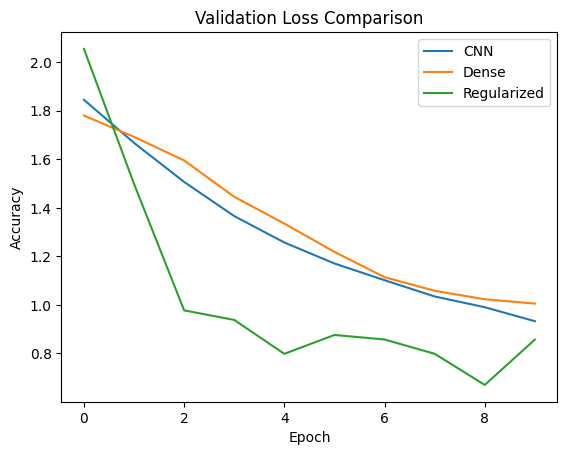

In [141]:
# Plot Validation Loss for all three models on the same graph
plt.plot(cnn_history.history['val_loss'], label='CNN')
plt.plot(dense_history.history['val_loss'], label='Dense')
plt.plot(reg_history.history['val_loss'], label='Regularized')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Validation Loss of 3 Models** 

The Validation Loss for the three models is as follows:

* CNN Model:  0.932

* Dense Model: 1.005

* Regularized Model: 0.857

While comparing the validation loss graph and data, it's clear that the Regularized Model has the lowest validation loss among the three models, which shows the model's ability to generalize new data and not overfit the training data. The Second lowest CNN Model is showing better performance than the model with the highest validation loss - Dense Model which is likely to have issues with overfitting the training data and identifying the new data.  

Validation Loss :    
**Regularized Model < CNN Model < Dense Model**

##Test Loss Comparison##

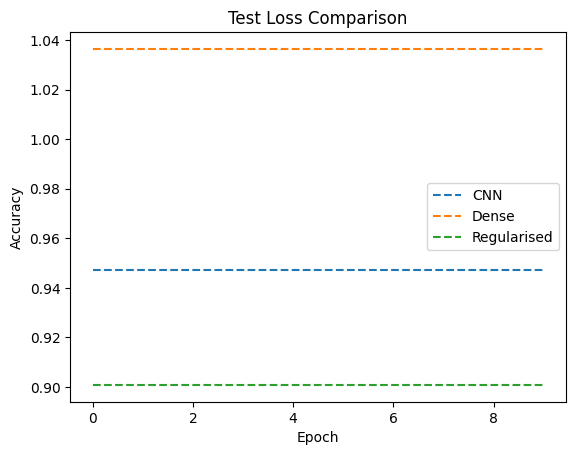

In [142]:
# Plot Testing Loss for all three models on the same graph
plt.plot(range(NUM_EPOCHS), [cnn_test_loss] * NUM_EPOCHS, linestyle='--',label='CNN')
plt.plot(range(NUM_EPOCHS), [dense_test_loss] * NUM_EPOCHS, linestyle='--',label='Dense')
plt.plot(range(NUM_EPOCHS), [reg_test_loss] * NUM_EPOCHS, linestyle='--',label='Regularised')
plt.title('Test Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Analysis of Testing Loss of 3 Models** 

The Testing Loss for the three models is as follows:

* CNN Model: 0.9471

* Dense Model: 1.0364

* Regularized Model: 0.9008

While comparing the testing loss graph and data, it's clear that the Regularized model has the lowest  validation  loss followed by the CNN model and the highest is for the Dense model. This implies that the Regularized model and the CNN model are performing better on test data than the Dense Model.   

Test Loss :    
**Regularized Model > CNN Model > Dense Model**

# Model Summary Table

In [143]:
# Select the 10th row of each column to get final value to accuracy and loss in a model
dense_acc_10 = dense_history.history['accuracy'][9]
dense_val_acc_10 = dense_history.history['val_accuracy'][9]
cnn_acc_10 = cnn_history.history['accuracy'][9]
cnn_val_acc_10 = cnn_history.history['val_accuracy'][9]
reg_acc_10 = reg_history.history['accuracy'][9]
reg_val_acc_10 = reg_history.history['val_accuracy'][9]
dense_loss_10 = dense_history.history['loss'][9]
dense_val_loss_10 = dense_history.history['val_loss'][9]
cnn_loss_10 = cnn_history.history['loss'][9]
cnn_val_loss_10 = cnn_history.history['val_loss'][9]
reg_loss_10 = reg_history.history['loss'][9]
reg_val_loss_10 = reg_history.history['val_loss'][9]

In [144]:
dense_params = dense_model.count_params()
cnn_params = cnn_model.count_params()
reg_params = reg_model.count_params()

# Combine the dataframes into a single table
summary_table = pd.DataFrame({'CNN': [cnn_params,' ', cnn_acc_10, cnn_val_acc_10, cnn_test_acc, ' ',cnn_loss_10, cnn_val_loss_10, cnn_test_loss],
                              'Dense': [dense_params,' ', dense_acc_10, dense_val_acc_10, dense_test_acc, ' ',dense_loss_10, dense_val_loss_10, dense_test_loss],
                              'Regularised': [reg_params,' ', reg_acc_10, reg_val_acc_10, reg_test_acc, ' ',reg_loss_10, reg_val_loss_10, reg_test_loss]},
                             index=['Total Parameters',' ', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy', ' ','Training Loss', 'Validation Loss', 'Test Loss'])

# Print the summary table
print(summary_table)

                          CNN     Dense Regularised
Total Parameters        16552     18900       14984
                                                   
Training Accuracy    0.671879  0.624969    0.701146
Validation Accuracy  0.685164  0.626752    0.681075
Test Accuracy        0.687226  0.605963    0.675826
                                                   
Training Loss        0.979045  1.026871    0.902061
Validation Loss      0.932949  1.005576    0.857198
Test Loss            0.947149  1.036443    0.900812


# Summary 

### Based on the comparison of training, validation and testing on the metrics of accuracy and loss. 
* The Regularized model performs the best overall with the highest testing accuracy and the lowest testing loss among the three models; it also has the lowest parameters.  
* The Regularized Model has a good balance between accuracy and loss, and it has methods to reduce the overfit. But the validation and testing accuracies are slightly lower than the Dense Model. 
* The CNN model has the highest testing accuracy, and the highest number of parameters that make it complex to train larger datasets.
* The Dense model has the lowest accuracy over the three model, also has the highest training and validation loss which may lead to overfitting of training data.    

## **Regularised Model > CNN Model >  Dense Model** ##

Overall, the Regularized model appears to be the best choice among these.